In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)

df = pd.read_csv('wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [240]:
print("Linhas:{}, \ncolunas:{}".format(df.shape[0],df.shape[1]))


Linhas:440, 
colunas:8


In [241]:
df.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [242]:
print("Média Geral: {0:.2f}".format(df.Milk.mean()))
data = df.groupby('Region').agg({'Milk': ['median','mean', 'std']})
data.columns = ["Mediana","Média", "Desvio Padrão"]
data

Média Geral: 5796.27


,Mediana,Média,Desvio Padrão
Region,,,
1,3748.0,5486.415584,5704.856079
2,2374.0,5088.170213,5826.343145
3,3684.5,5977.085443,7935.463443


In [243]:
df.max()

Channel                  2
Region                   3
Fresh               112151
Milk                 73498
Grocery              92780
Frozen               60869
Detergents_Paper     40827
Delicassen           47943
dtype: int64

<Figure size 432x288 with 0 Axes>

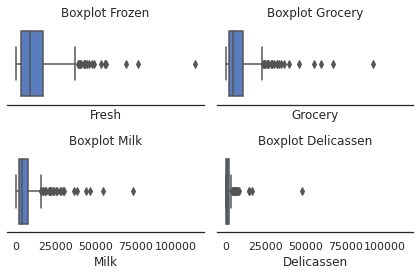

In [244]:

fig = plt.figure()
f, axes = plt.subplots(2, 2, sharex=True)
sns.despine(left=True)
ax1 = sns.boxplot(x="Fresh",data = df,ax=axes[0, 0])
ax1.set_title('Boxplot Frozen')
ax2 = sns.boxplot(df.Grocery,ax=axes[0, 1])
ax2.set_title('Boxplot Grocery')

ax3 = sns.boxplot(df.Milk,ax=axes[1, 0])
ax3.set_title('Boxplot Milk')
ax4 = sns.boxplot(df.Delicassen,ax=axes[1, 1])
ax4.set_title('Boxplot Delicassen')
plt.tight_layout()
plt.show()

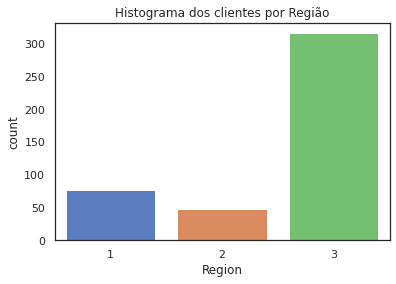

In [245]:

sns.countplot(df.Region)
plt.title('Histograma dos clientes por Região')
plt.show()

In [246]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


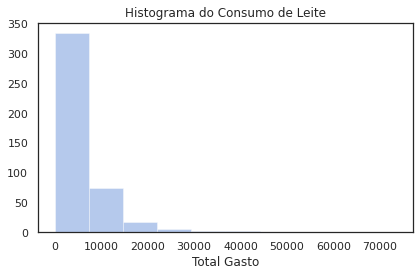

In [247]:
fig = plt.figure()
sns.distplot(df.Milk, kde=False, bins = 10);
plt.title('Histograma do Consumo de Leite')
plt.xlabel('Número de consumidores')
plt.xlabel('Total Gasto')
plt.tight_layout()

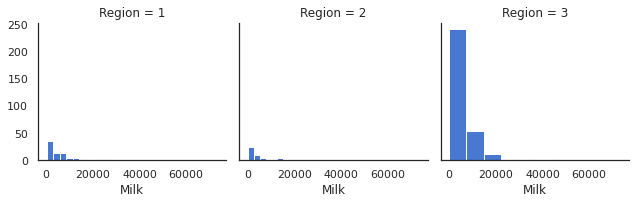

In [248]:
g = sns.FacetGrid(df, col="Region")
g.map(plt.hist, "Milk");

In [249]:

df.groupby('Channel').sum()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,748,4015717,1028614,1180717,1116979,235587,421955
2,371,1264414,1521743,2317845,234671,1032270,248988


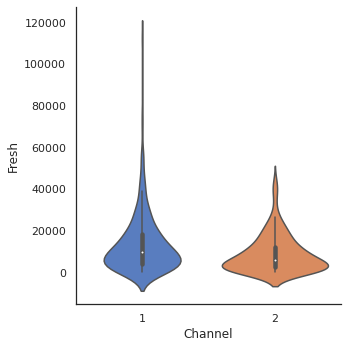

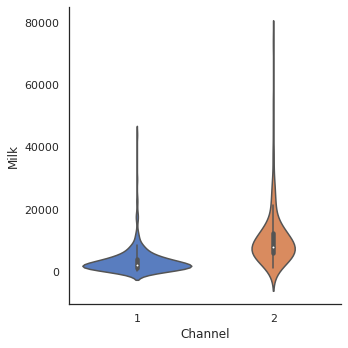

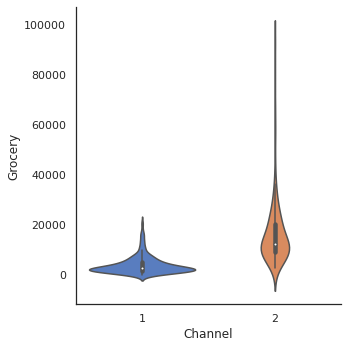

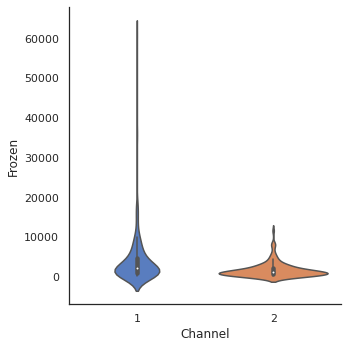

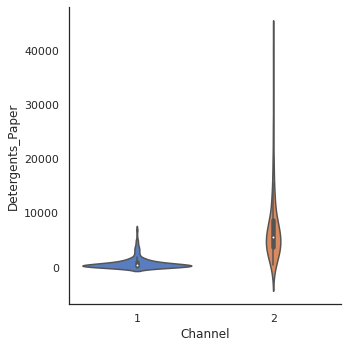

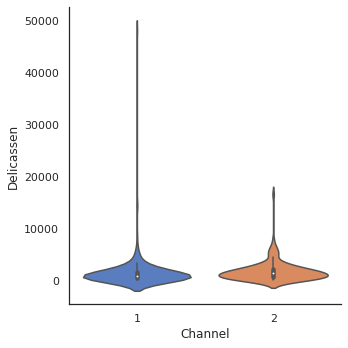

In [250]:

var = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for v in var:
    sns.catplot(x="Channel", y=v, kind='violin', data=df);

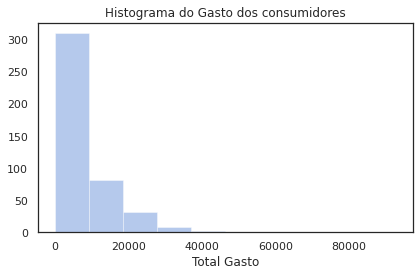

In [251]:

fig = plt.figure()
sns.distplot(df.Grocery, kde=False, bins = 10);
plt.title('Histograma do Gasto dos consumidores')
plt.xlabel('Número de consumidores')
plt.xlabel('Total Gasto')
plt.tight_layout()


/home/cassio/Área de Trabalho/igti/igti/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


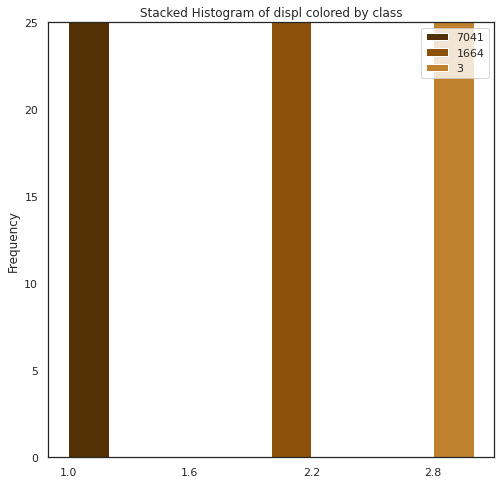

In [252]:
gb_df = df[["Region", "Grocery"]].groupby("Region")
lx = []
ln = []

# handpicked colors
colors = ["#543005", "#8c510a", "#bf812d"]

# iterate over very groupby group and
# append their values as a list
# THIS IS A CRUCIAL STEP
for _, df_ in gb_df:
    lx.append(df_["Region"].values.tolist())
    ln.append(list(set(df_["Grocery"].values.tolist()))[0])

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data

# hist returns a tuple of 3 values
# let's unpack it
n, bins, patches = ax.hist(lx, bins = 10, stacked = True, density = False, color = colors)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change x lim
ax.set_ylim(0, 25)
# set the xticks to reflect every third value
ax.set_xticks(bins[::3])

# set a title
ax.set_title("Stacked Histogram of displ colored by class")

# add a custom legend wit class and color
# you have to pass a dict
ax.legend({class_:color for class_, color in zip(ln, colors)})

# set the y label
ax.set_ylabel("Frequency");

In [253]:
gb_df = df[["Region", "Grocery"]].groupby("Region")
print(gb_df)


**Segmentação de clientes utilizando compras no supermercado e produtos de limpeza.**

In [254]:
#biblioteca para realizar a construção do algoritmo não supervisionado K-means
from sklearn.cluster import KMeans

In [255]:
#obtém os dados para a construção do banco de dados apenas com compras de congelados e produtos de limpeza
segmentacao_1 = df[['Grocery' , 'Detergents_Paper']].iloc[: , :].values #transforma os dados em array


In [256]:
kmeans = KMeans(n_clusters=3) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
kmeans.fit(segmentacao_1) #aplica o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_1) #encontra os grupos

Text(0.5, 1.0, 'Segmentação de clientes por gastos com  Produots de supermercado x Produtos de higiene')

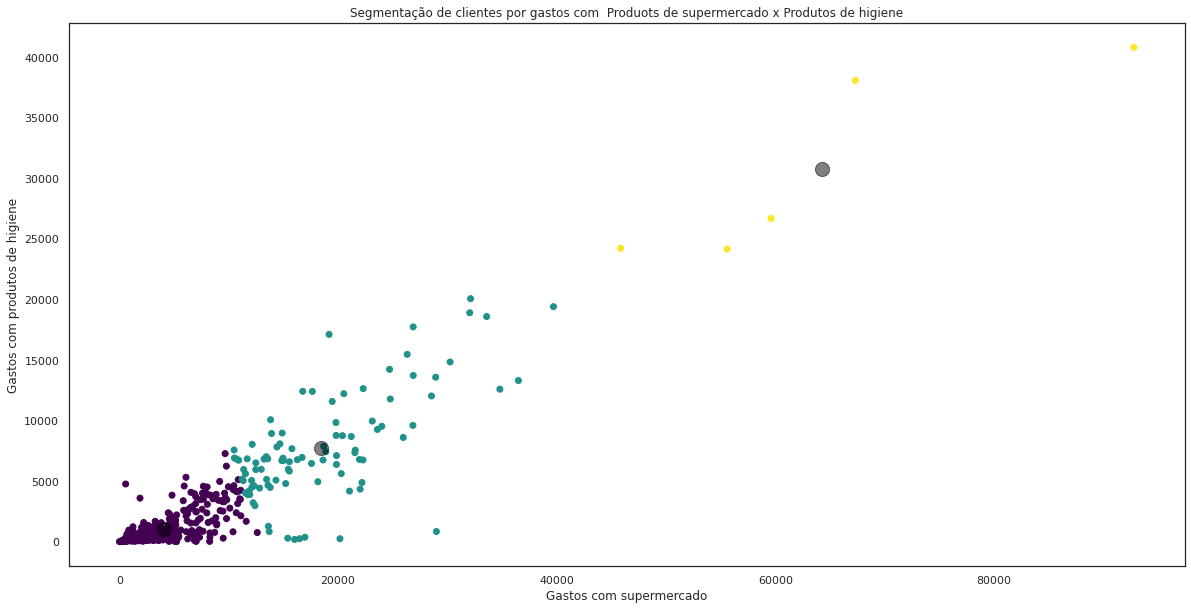

In [257]:
#inicia a construção da figura
plt.figure(figsize = (20 , 10) ) #define o tamanho da figura

plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel("Gastos com supermercado")  #adiciona o label para o eixo X
plt.ylabel("Gastos com produtos de higiene") #adiciona o label para o eixo Y
plt.title("Segmentação de clientes por gastos com  Produots de supermercado x Produtos de higiene") #adiciona o título
